## Analysis on Titanic Sinking Disaster
**Author: Mingzhu Ye <mzye.io@gmail.com> **
### 1. Overview

#### 1.1 Data Introduction
This Notebook is used to show detailed steps for investigating the **Titanic** sinking disaster data,
[Click for details & download](https://www.kaggle.com/c/titanic/data)
#### 1.2 Analysis Goal
To mine the main factors, which are significantly associated with survived rate from the sinking disaster. <br/>
Questions: 
* Does female have higher survival rate than male? 
* Does first passenger class have higher survival rate than other passenger classes? 
#### 1.3 Investigating Steps
* Import data with package 'pandas'
* Clean raw titanic data annd remove missing values
* From summary statistics, multiple variables are seemingly to be associated with Survived rate
* Draw exploratory plots with 'matplotlib' and 'seaborn'
* Hypothesis test 

### 2. Data Wrangling 

#### 2.1 Import Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
raw_titanic = pd.read_csv('titanic-data.csv')

In [8]:
raw_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 2.2 Clean Data

In [12]:
raw_titanic.shape ## get demension info

(891, 12)

*Note: 891 rows(passengers), and 12 columns which are PassengerId, Survived, Pclass, Name, Sex, Age, SlibSp, Parch, Ticket, Fare, Cabin, Embarked. *

In [15]:
raw_titanic[pd.isnull(raw_titanic['Survived'])].shape[0]  

0

*Note: No NaN value under column 'Survived'.*

In [16]:
raw_titanic[pd.isnull(raw_titanic['Age'])].shape[0] 

177

In [17]:
raw_titanic[pd.isnull(raw_titanic['Embarked'])].shape[0]

2

In [19]:
raw_titanic[pd.isnull(raw_titanic['Cabin'])].shape[0]

687

*Note: there are 177 rows under column 'Age' with NaN, 2 rows under 'Embarked' with NaN, 687 rows under 'Cabin' with NaN. *

##### 2.2.1 Cleaning Steps: 
* It will be helpful to remove the 'Cabin' feature from raw data first, since cleaning NaN from column 'Cabin' will exclude most of the rows from raw dataset. 
* Implement df.dropna() function to remove NaN value from the remaining dataset. 

In [20]:
titanic = raw_titanic.drop(['Cabin'], axis=1)
titanic.shape

(891, 11)

In [21]:
titanic = titanic.dropna()
titanic.shape

(712, 11)

In [22]:
titanic[titanic['Survived']==1].shape[0]

288

In [23]:
titanic[titanic['Survived']==0].shape[0]

424

### 3. Summary Statistics 
In order to view the data structure from different angles, we are going to group titanic data by dimensions of Pclass, Sex and metrics of Survived, and calculating statistics for numerical variable Age: 

In [27]:
titanic['Age'].describe() # basic statistics for column Age

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
titanic.groupby('Pclass').sum()['Survived'] # first class has most survival

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64

In [25]:
titanic.groupby('Sex').sum()['Survived'] # female has larger survival rate than male

Sex
female    195
male       93
Name: Survived, dtype: int64

In [26]:
titanic.groupby(['Pclass', 'Sex']).sum()['Survived'] # divide titanic data by Pclass and Sex. 

Pclass  Sex   
1       female    80
        male      40
2       female    68
        male      15
3       female    47
        male      38
Name: Survived, dtype: int64

**Observation: There are patterns existed within Pclass, Sex and Survived** 

### 4. Visualization
By drawing plots for 1D, 2D data, we can gain intuition on the factors associated with survival <br/>

**Plot0: distribution for age**

Populating the interactive namespace from numpy and matplotlib


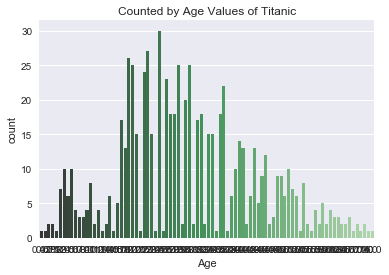

In [29]:
%pylab inline
sns.countplot(x="Age", data=titanic, palette="Greens_d")
sns.plt.title('Counted by Age Values of Titanic')

**Plot1: kernel density estimate of the subset of the 1st, 2nd, 3rd class passangers's age: **

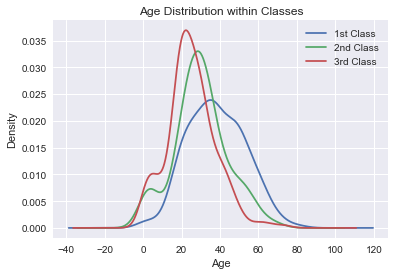

In [30]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within Classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

**Plot2: Counted by Categories of Pclass and Sex**

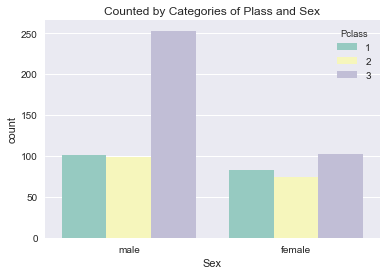

In [31]:
sns.countplot(x="Sex", hue="Pclass", data=titanic , palette="Set3")
sns.plt.title('Counted by Categories of Plass and Sex')

**Plot3: Average Survived rate within Pclass and Sex**

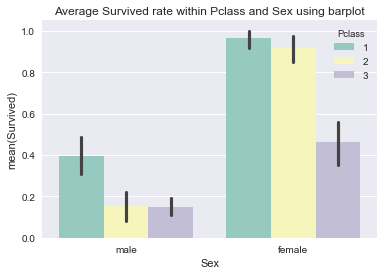

In [32]:
sns.barplot(x = titanic['Sex'], y= titanic['Survived'], hue= titanic['Pclass'], data=titanic, palette="Set3")
sns.plt.title('Average Survived rate within Pclass and Sex using barplot')

**Plot4: Average survived rate within sex and passenger class**

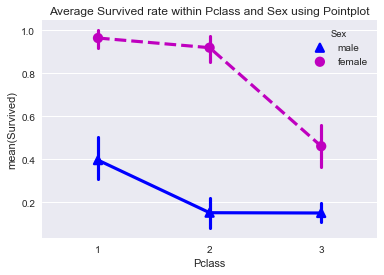

In [33]:
sns.pointplot(x=titanic['Pclass'], y=titanic['Survived'], hue=titanic['Sex'], data=titanic,
              palette={"male": "b", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);
sns.plt.title('Average Survived rate within Pclass and Sex using Pointplot')

### 5. Hypothesis Test
Accorging to steps of summary statistics and visualizations, there seems to be relationships between Pclass, Sex and Survived. We need to do hypothesis tests to draw conclusions. 
#### 5.1 Gender and Survival  Test
H0: Gender doesn't affect survival rate <br/>
Ha: Gender affects survival

In [34]:
titanic['Pclass'].corr(titanic['Survived'])

-0.35646158844523845

In [35]:
female= titanic[titanic['Sex'] == 'female']['Survived']
male = titanic[titanic['Sex'] == 'male']['Survived']
stats.ttest_ind(female, male)

Ttest_indResult(statistic=16.95138209331607, pvalue=2.2428516419834136e-54)

**Conclusion**: Pvalus is small, thus we have enough confidence to reject null hypothesis. And according to the previous exploraty analyses, we are even more confident that females' survivals are higher than males'. 

#### 5.2 Pclass and Survival Test
H0: Passengers' class level doesn't affect survival rate <br/>
Ha: Passengers' class level affects survival rate


In [36]:
cl1= titanic[titanic['Pclass'] == 1]['Survived']
cl2 = titanic[titanic['Pclass'] == 2]['Survived']
cl3 = titanic[titanic['Pclass'] == 2]['Survived']

stats.ttest_ind(cl1, cl3) 

Ttest_indResult(statistic=3.328599229057307, pvalue=0.00096430710744062212)

In [37]:
stats.ttest_ind(cl1, cl2) 

Ttest_indResult(statistic=3.328599229057307, pvalue=0.00096430710744062212)

**Conclusion**: Though Pvalue is not significantly small, we still have confidence to regect null hypothesis. And according to the previous analyses, there'are certainty that first class has higher survival rate than other class levels. 

### 6. Conclusion
The two questions can be nearly answered based on our limited assumptions for the dataset. Generally, female has higher survival rate than male, and there is positive relationship between passenger class level and survival rate. <br/>
Speaking of accuracy, this analysis needs more steps, like make wise assumptions and polish the methodology toolkits, such as include more variables(SibSp, Parch), sepearate dataset into training and testing, build models and make predictions using cross-validations.
